In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os
import warnings
import nltk
import string
import collections
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

from textblob import TextBlob,Word,Blobber

nltk.download('stopwords')
warnings.filterwarnings('ignore')
filepath = os.path.join(os.getcwd(),'CSV_Files','ninja_reports.xls')
df = pd.read_excel('ninja_reports2.xls',sheet_name='ninja_reports')

df_w = pd.read_csv("ward_details.csv")

[nltk_data] Downloading package stopwords to C:\Users\Adithi
[nltk_data]     Satish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
df.head(40)

,id,createdAt,updateAt,userId,title_id,title,category,description,latitude,longitude,...,civic_agency,civic_agency_title,civic_agency_number,jg_category_id,jg_category,jg_sub_category,user_status,status_id,city_id,createdInJanagraha
0,2529,2019-02-26 08:51:18,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage behind the temple,12.925020,77.590748,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
1,2540,2019-02-26 20:58:20,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution,13.045039,77.590984,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
2,2542,2019-02-26 21:04:38,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution in hebbal,13.030531,77.587002,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
3,2550,2019-02-27 07:43:14,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage is dumped near BES,12.926228,77.588806,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
4,2552,2019-02-27 09:34:35,2019-09-04 23:21:36,622,0,Air Pollution,1,Leaf and garbage burning on Shakthi Ganapathi ...,12.925195,77.590896,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
5,2553,2019-02-27 17:06:02,2019-10-17 12:54:15,876,0,Garbage,6,There is a lot of garbage dump in and around t...,12.956251,77.710715,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
6,2554,2019-02-28 05:59:43,2019-09-05 08:00:02,1322,0,Maintenance/Repair Of Streetlights,2,Replace broken streetlight. Complaint #5 about...,12.948437,77.569115,...,BBMP,BBMP,8.022660e+09,62,Streetlights,Maintenance/Repair Of Streetlights,1,3,1.0,1
7,2555,2019-02-28 09:43:43,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Red Matiz parked on the footpath for more than...,12.950711,77.568224,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
8,2556,2019-02-28 09:49:15,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Cars have been using the footpath as a parking...,12.950390,77.568743,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
9,2560,2019-03-01 08:42:25,2019-07-31 16:20:31,1905,84,Traffic Jams/Congestion Or Bottlenecks,5,Congestion everyday and at all times due to im...,12.932159,77.541598,...,NaN,NaN,NaN,84,Traffic Jams/Congestion Or Bottlenecks,NaN,2,3,1.0,1


In [66]:
df.count()

id                     10723
createdAt              10723
updateAt               10723
userId                 10723
title_id               10723
title                  10723
category               10723
description            10723
latitude               10723
longitude              10723
landmark               10318
location                9993
web_url                 5569
ward_id                10698
ward_title              9234
civic_agency            4667
civic_agency_title      4667
civic_agency_number     5651
jg_category_id         10723
jg_category            10723
jg_sub_category         5569
user_status            10723
status_id              10723
city_id                10719
createdInJanagraha     10723
dtype: int64

In [67]:
df = df.drop(columns = ['jg_sub_category','title_id','web_url','civic_agency_title','civic_agency_number','user_status','createdInJanagraha'])

In [68]:
def cor_mat():
    #Correlation Matrix
    corr = df.corr()
    plt.figure(num=None, figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


In [69]:
def isint(n):
    try:
        int(n)
        return n
    except:
        return -1;

def ward():
    l = list(df.ward_id.unique())
    len(l)
    ward_count = 0
    for i in df.ward_id:
        if(i<=198):
            ward_count+=1
    print("Noise: ",ward_count)

In [70]:
city_number = []
blor = ["chennai"] #['bangalore', 'Bangalore', 'bengaluru', 'Bengaluru', 'BANGALORE', 'BENGALURU']
i = 0
for city in df.location:
    #print(str(city))
    if "chennai" in str(df.location[i]).lower():
        city_number.insert(i, 2)
    elif "Tamil Nadu" in str(df.location[i]):
        city_number.insert(i, 2)
    elif "Andhra Pradesh" in str(df.location[i]):
        city_number.insert(i, 4)
    elif "Telangana" in str(df.location[i]):
        city_number.insert(i,4)
    elif "hosur" in str(df.location[i]).lower():
        city_number.insert(i,3)
    elif "bangalore" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "bengaluru" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "560023" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "uttarahalli" in str(df.location[i]).lower():
        city_number.insert(i,1)
    else:
        city_number.insert(i,0)
    i += 1
df['city_number'] = city_number

count = 0
for n in df.city_number:
    if n == 1:
        #print(df.location[k])
        count+=1
print(count)

3031


<BarContainer object of 5 artists>

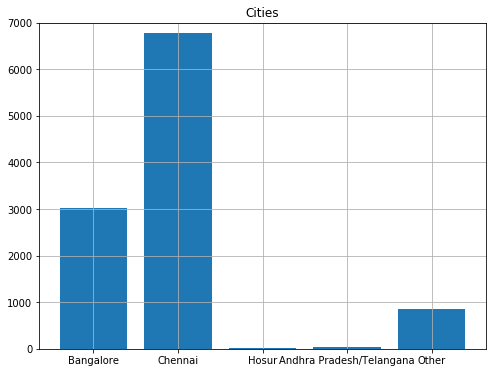

In [100]:
plt.figure(figsize = (8,6))
plt.ylim(0,7000)
plt.title("Cities")
plt.grid(True)
plt.bar(['Bangalore','Chennai','Hosur','Andhra Pradesh/Telangana','Other'],[city_number.count(1),city_number.count(2),city_number.count(3),city_number.count(4),city_number.count(0)])

In [72]:
c_count = 0
for i in df.location:
    if pd.isna(i):
            c_count+=1
print("Count : ",c_count)

Count :  730


In [73]:
def new_title():
    new_title_id = []
    i = 0
    for name in df.title:
        if name in ['Garbage', 'Garbage Dumping In Vacant Lot/Land', 'Implementation Of Waste Segregation/Garbage', 'Clearance Of Garbage Dump Or Black Spot', 'Clearing Of Roadside Dustbin', 'Collection Of Door-to-door Garbage', 'BPAC – Black Spot']:
            new_title_id.insert(i, 'Waste/Garbage')
        elif name in ['Air Pollution']:
            new_title_id.insert(i, 'Air')
        elif name in ['Maintenance/Repair Of Streetlights', 'Dangling Or Hanging Of OFCs/Cables/Wires', 'Removal Of Illegal Posters And Hoardings']:
            new_title_id.insert(i, 'Streetlights')
        elif name in ['Regular Supply Of Electricity']:
            new_title_id.insert(i, 'Electricity')
        elif name in ['Maintenance And Repair Of Manholes', 'Fixing/Reparing Potholes']:
            new_title_id.insert(i, 'Potholes')
        elif name in ['Traffic Jams/Congestion Or Bottlenecks','Wrong Parking', 'Wrong parking', 'Parking On Footpath']:
            new_title_id.insert(i, 'Traffic/Parking')
        elif name in ['Provide Sewage lines', 'Maintenance And Repair Of Sewage Lines']:
            new_title_id.insert(i, 'Sewage')
        elif name in ['Stop Water Leakage', 'Flooding/Waterlogging Of Roads And Footpaths','Maintenance Of Lake Surrounding']:
            new_title_id.insert(i, 'Water')
        elif name in ['Single Use plastic generator']:
            new_title_id.insert(i, 'Plastic')
        else:
            new_title_id.insert(i, 'Other')
        i = i+1
    df['new_title_id'] = new_title_id
new_title()

{6: 6129, 1: 333, 2: 1178, 5: 662, 7: 1548, 4: 193, 9: 680}


([<matplotlib.patches.Wedge at 0x20b723270f0>,
 [Text(-0.24526668961402678, 1.0723079086558007, '6'),
  Text(-0.9393368107506592, -0.5724040146337028, '1'),
  Text(-0.6035870969350359, -0.9196100349678312, '2'),
  Text(-0.045910922685439975, -1.0990414856492778, '5'),
  Text(0.6262984879178949, -0.9042954185617433, '7'),
  Text(0.9880903022759902, -0.4834020630367052, '4'),
  Text(1.078242385745051, -0.21770015522001965, '9')],
 [Text(-0.13378183069856003, 0.584895222903164, '57.16'),
  Text(-0.5123655331367232, -0.3122203716183833, '3.11'),
  Text(-0.32922932560092866, -0.5016054736188169, '10.99'),
  Text(-0.02504232146478544, -0.599477173990515, '6.17'),
  Text(0.34161735704612445, -0.49325204648822357, '14.44'),
  Text(0.5389583466959945, -0.26367385256547554, '1.80'),
  Text(0.5881322104063914, -0.11874553921091979, '6.34')])

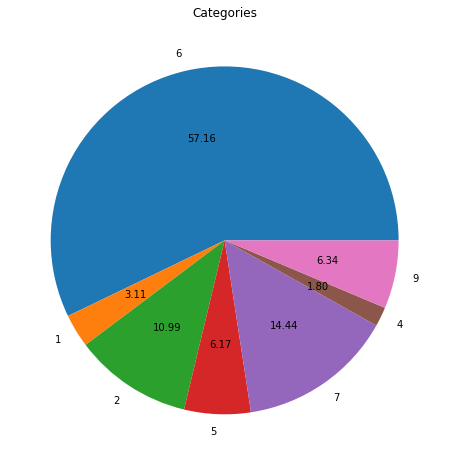

In [74]:
cat = {}
for i in df.category.unique():
    cat[i] = 0

for i in df.category:
    cat[i] +=1

print(cat)
plt.figure(figsize = (8,8))
plt.title("Categories")
plt.pie(cat.values(),labels = cat.keys(),autopct = '%.2f')

{'Waste/Garbage': 5869, 'Air': 333, 'Streetlights': 812, 'Traffic/Parking': 662, 'Sewage': 451, 'Potholes': 1257, 'Electricity': 4, 'Water': 1077, 'Plastic': 258}


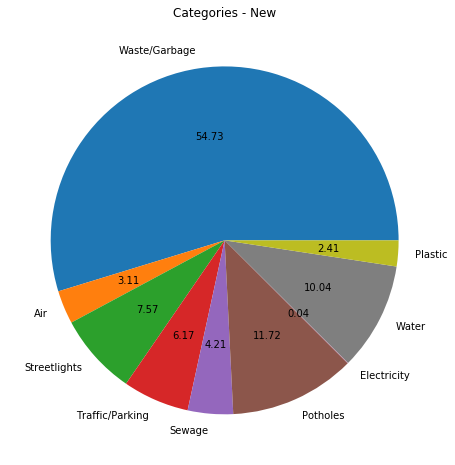

In [75]:
def bar_new_cat():
    new_cat = {}
    for i in df.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (8,8))
    plt.title("Categories - New")
    #plt.grid(True)
    print(new_cat)
    plt.pie(new_cat.values(),labels = new_cat.keys(),  autopct = '%.2f')# color = ['green','red'], tick_label = df.new_title_id.unique())

bar_new_cat()

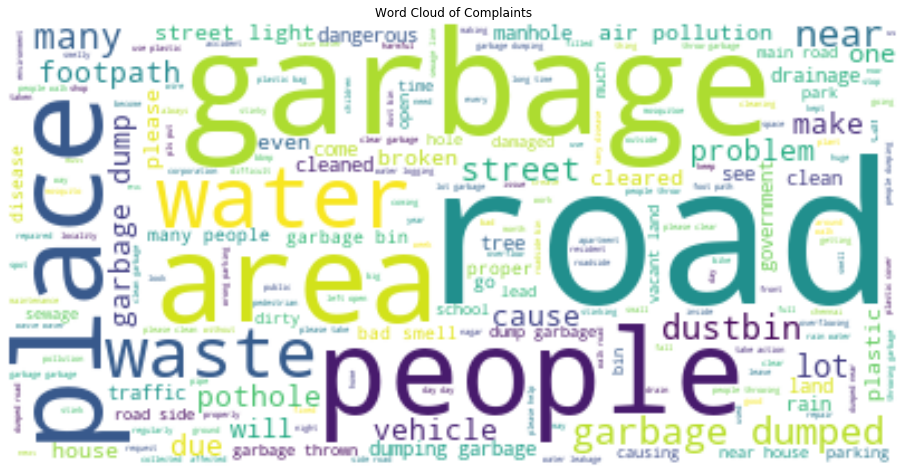

In [76]:
def word_cloud(df):
    df['description'] = df['description'].str.lower()
    des = df.description.str.split(' ')
    #des.head()
    des_cleaned = []

    #removing punctuation
    for text in des:
        text = [x.strip(string.punctuation) for x in text]
        des_cleaned.append(text)

    #des_cleaned[0]

    #joining all the text
    text_des = [" ".join(text) for text in des_cleaned]
    fin_text = " ".join(text_des)
    #final_text_spam[:500]
    wordcloud_spam = WordCloud(background_color="white").generate(fin_text)

    # Lines 2 - 5
    plt.figure(figsize = (16,16))
    plt.title("Word Cloud of Complaints")
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud(df)

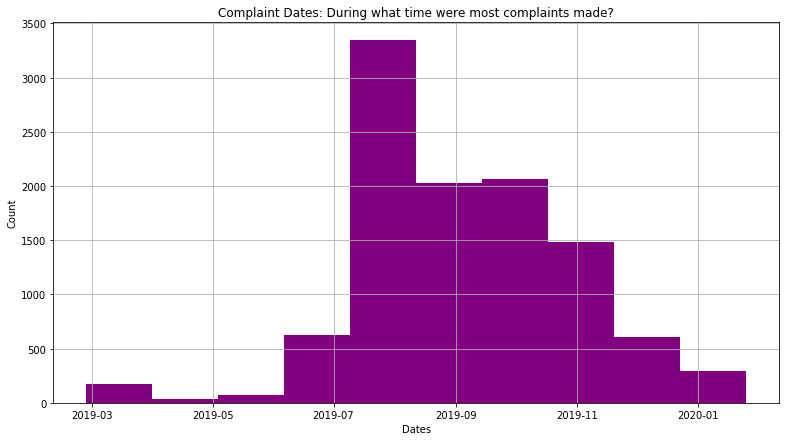

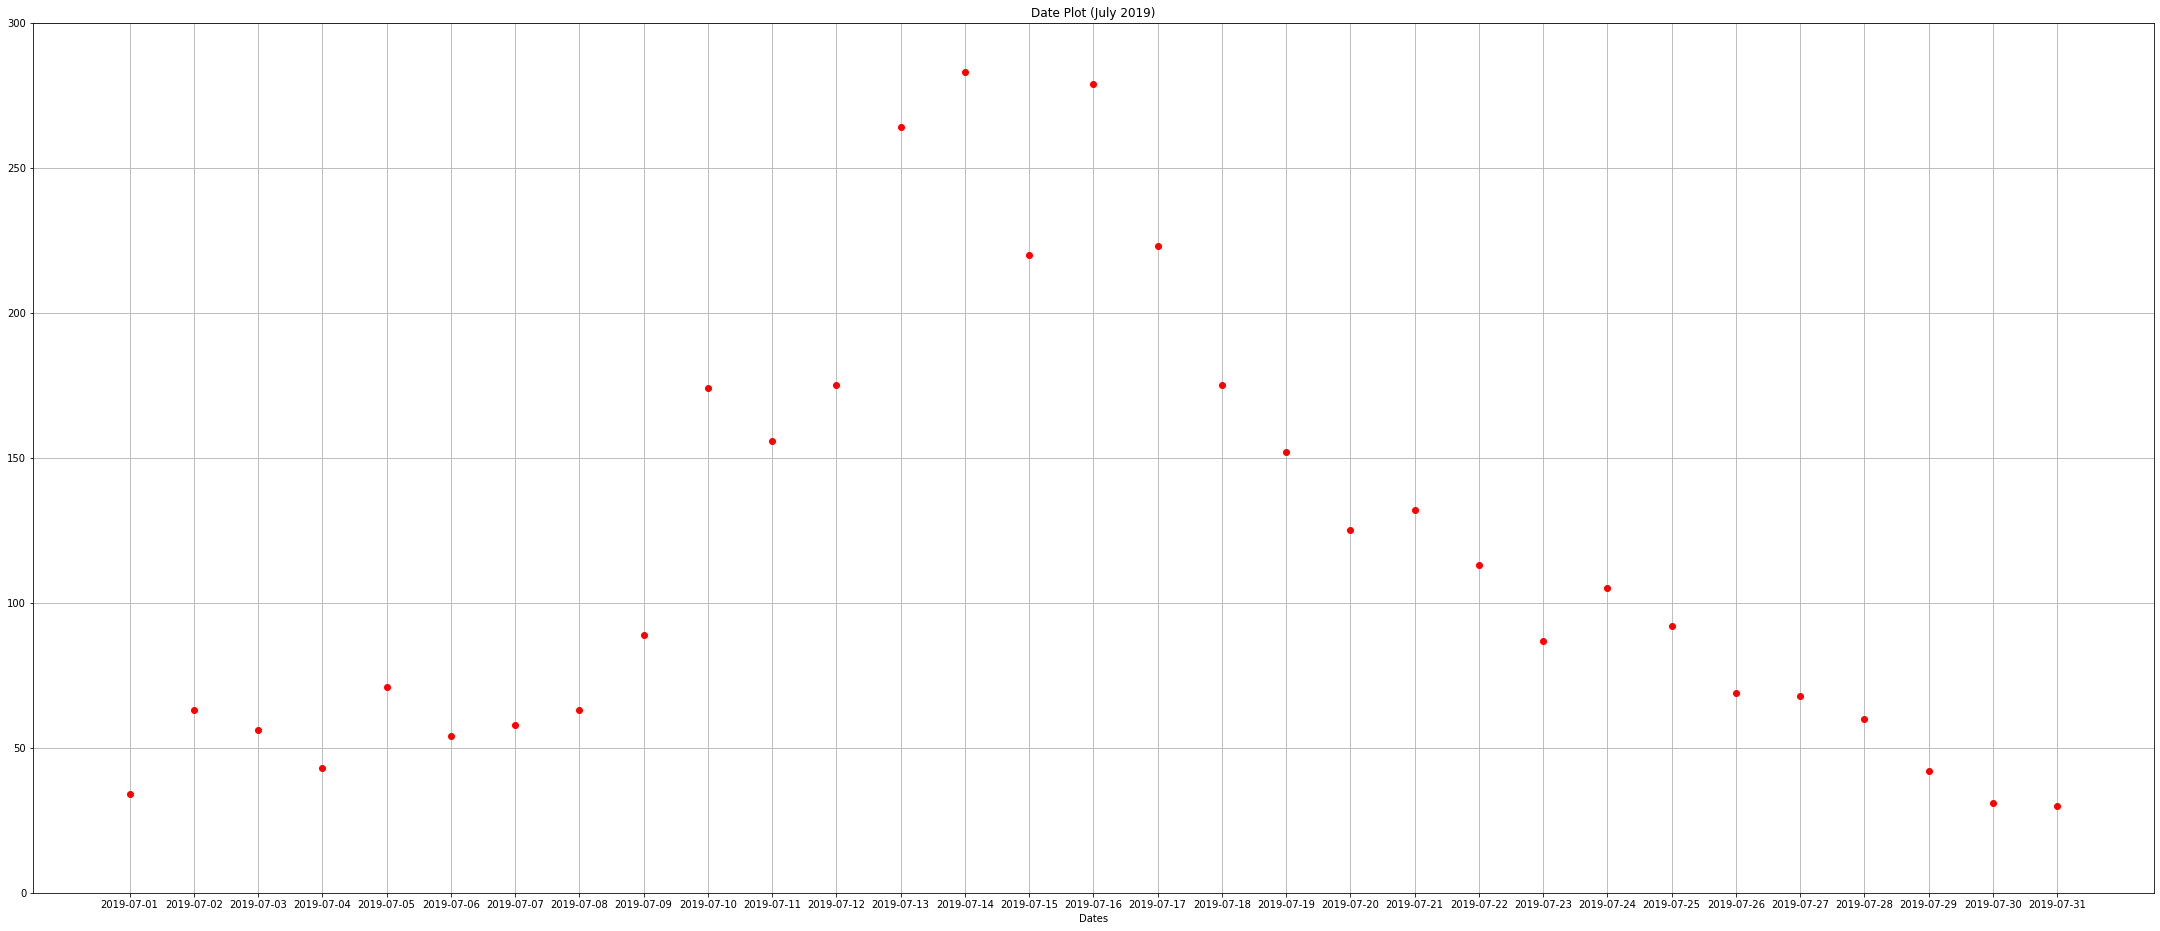

In [77]:
def date_plot():
    df.createdAt = pd.to_datetime(df['createdAt'])
    plt.figure(figsize=(13,7))
    plt.title("Complaint Dates: During what time were most complaints made?")
    plt.xlabel('Dates')
    plt.grid(True)
    plt.ylabel('Count')
    plt.hist(df.createdAt,color='purple')

def date_plot_july():
    dates = []
    for i in df.createdAt:
        d1 = str(i).split(' ')
        d = d1[0].split('-')
        if d[1] == '07':
            dates.append(d1[0])
    date = {}
    for i in dates:
        if i not in date:
            date[i] = 1
        else:
            date[i]+=1
    #print(date['2019-10-02'])
    plt.figure(figsize = (38,16))
    plt.title("Date Plot (July 2019)")
    plt.xlabel("Dates")
    plt.grid(True)
    plt.ylim(0,300)
    plt.plot_date(date.keys(),date.values(),color = 'red')
#plt.hist(dates)

date_plot()
date_plot_july()

In [78]:
print(df.status_id.unique())

[ 3  1 10  2  9  0]


The status IDs :  {3: 1395, 1: 6483, 10: 2434, 2: 90, 9: 84, 0: 237}


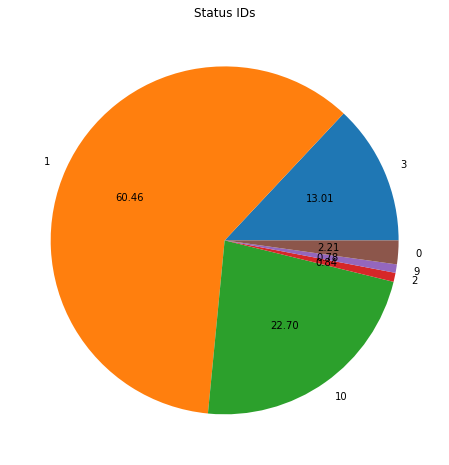

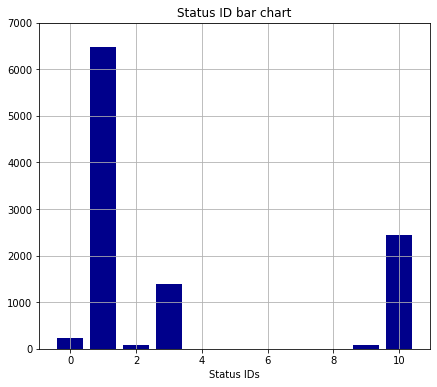

In [79]:
stat = {}
def stat_id_pie(): 
    for i in df.status_id:
        if i not in stat:
            stat[i] = 1
        else:
            stat[i]+=1
    #print(stat)
    plt.figure(figsize = (8,8))
    plt.title("Status IDs")
    plt.pie(stat.values(),labels = stat.keys(),autopct = "%.2f")

def stat_id_bar():
    print("The status IDs : ",stat)
    plt.figure(figsize = (7,6))
    plt.title("Status ID bar chart")
    plt.grid(True)
    plt.xlabel("Status IDs")
    plt.ylim(0,7000)
    plt.bar(stat.keys(), height=stat.values(), color = 'darkblue')
    
stat_id_pie()
stat_id_bar()

{'Waste/Garbage': 1395}


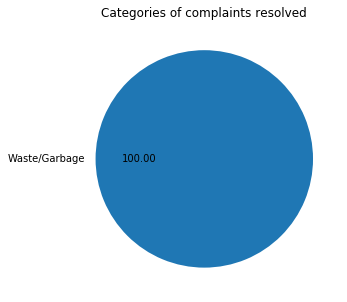

In [80]:
def stat_resolved():
    df1 = df[['new_title_id','status_id']]
    #print(df1)
    #for i in df1.categor
    cat = list(df.new_title_id)
    stat = list(df.status_id)
    res = {}
    for i in stat:
        if i==3:
            ct = cat[stat.index(i)]
            if ct not in res:
                res[ct] = 1
            else:
                res[ct]+=1
    print(res)
    plt.figure(figsize = (5,5))
    plt.title("Categories of complaints resolved")
    plt.pie(res.values(),labels = res.keys(),autopct = '%.2f')
stat_resolved()

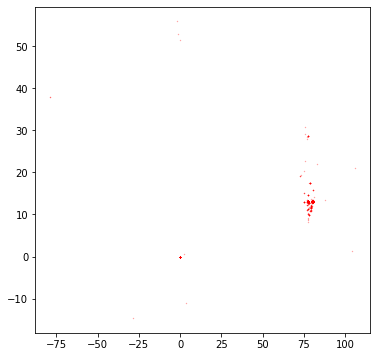

In [81]:
fig, axes = plt.subplots(figsize=(6,6))
axes.scatter(df.longitude, df.latitude, s=0.1, alpha=0.5, c='r')
plt.show()


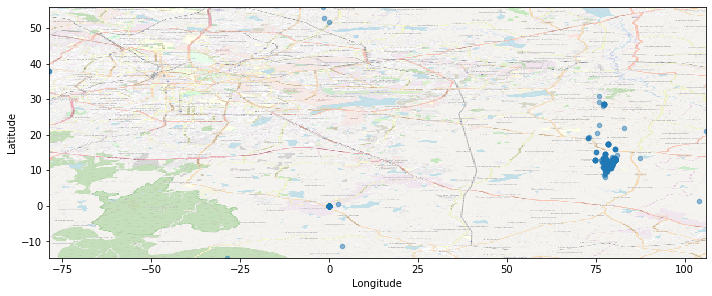

In [82]:
bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = df.plot(figsize=(10,15), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [min(df.longitude) + epsilon, max(df.longitude) + epsilon, 
             min(df.latitude) + epsilon, max(df.latitude) + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)
'''
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')
# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)'''

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

plt.tight_layout()

plt.show()

In [83]:
print(min(abs(df.latitude)))

0.0


In [84]:
count = 0
for i in df.latitude:
    if int(i)==0:
        count+=1
print(count)

460


In [85]:
df_dict = df.to_dict()
#df_dict
count = 0
for j in range(len(df['id'])):
    if int(df_dict['latitude'][j])==0 and int(df_dict['longitude'][j])==0:
        count+=1
print(count)

459


In [86]:
#hdsf

Categories
Waste/Garbage : 1729
Air : 62
Streetlights : 214
Traffic/Parking : 131
Sewage : 116
Potholes : 409
Electricity : 3
Water : 232
Plastic : 135


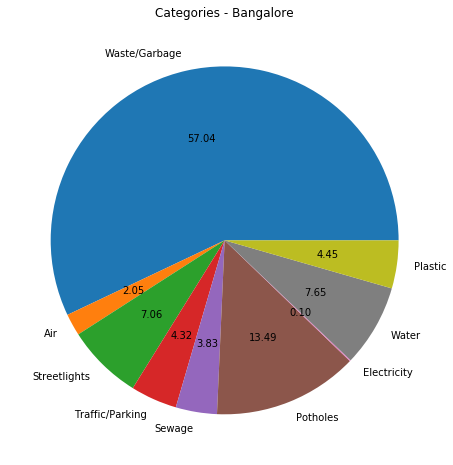

In [107]:
df_b = df[df['city_number']==1]

def cat_b():
    new_cat = {}
    for i in df_b.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (8,8))
    plt.title("Categories - Bangalore")
    #plt.grid(True)
    print("Categories")
    for i in new_cat:
        print(i,":",new_cat[i])
    plt.pie(new_cat.values(),labels = new_cat.keys(),  autopct = '%.2f')# color = ['green','red'], tick_label = df.new_title_id.unique())

cat_b() 

In [108]:
def ward_cleaning():
    count = 0
    noise = []
    for i in df_b.ward_id:
        if i not in list(range(1,199)):
            count+=1
            noise.append(i)
    print(count)
    loc = []
    for i in np.unique(np.array(noise)):
        loc.append((df_b.loc[df['ward_id']==i]).location)
    print(loc)
    
ward_cleaning()


195
[23                                               bangalore
24                                               bangalore
25                                               bangalore
59                                               bangalore
60                                               bangalore
61                                               bangalore
184      59, West Anjaneya Temple Street, Gandhi Bazaar...
185      59, West Anjaneya Temple Street, Gandhi Bazaar...
186      119/36, 33rd Cross Rd, 4th Block, Jayanagar, B...
193      682, Outer Ring Rd, Jeewan Griha Colony, 2nd P...
194      JP Nagara 4th Phase, Jeewan Griha Colony, 2nd ...
201      #578,21st Main,35th Cross,4th ‘T’ Block,Jayana...
202      Jayanagar 4Th Block, 4th T Block East, 4th Blo...
203      9th Main Rd, 4th T Block East, 4th Block, Jaya...
204      189, 5th Main Rd, 4th Block, Jayanagar, Bengal...
205      Jayanagar, 4th Block, Jayanagar, Bengaluru, Ka...
206      77, Vanivilas Rd, Gandhi Bazaar, Basavanag

In [109]:
#df['description'].isnull().sum()

In [110]:
#print(df_b.shape)

In [111]:
df_w.head(10)

,Ward_No,Ward_Name,LS_const
0,1,Kempegowda,Chikballapur
1,2,Chowdeshwari,Chikballapur
2,3,Attur,Chikballapur
3,4,Yelahanka Satellite Town,Chikballapur
4,5,Jakkur,Bangalore North
5,6,Thanisandra,Bangalore North
6,7,Byatarayanapura,Bangalore North
7,8,Kodigehalli,Bangalore North
8,9,Vidyaranyapura,Bangalore North
9,10,Doddabommasandra,Bangalore North


In [112]:
#df.count()


The following cells of code depict a machine learning model that uses NLP to filter and preprocess the text data given in df.description, using df.new_title_id as the target values.
Uses NLTK, RE, SKLEARN libraries

pip install -U scikit-learn HAS to be done before running the below snippets of code

In [113]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

stemmer = PorterStemmer()
words = stopwords.words("english")

#the preprocessing is done in 4 steps:

#removing punctuation
#removing stopwords like 'the', 'this','as',etc
#conversion of the entire text to lower case
#Stemming: reducing the number of inflectional forms of words by reducing all to their common stem.
#For example, 'argue','arguing','argued' are all reduced to 'argu'
df['processedtext'] = df['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [114]:
df.processedtext.head(10)

0                                  garbag behind templ
1                                           air pollut
2                                    air pollut hebbal
3                                  garbag dump near be
4    leaf garbag burn shakthi ganapathi templ premi...
5    lot garbag dump around area lot small petti sh...
6                  replac broken streetlight complaint
7    red matiz park footpath month action polic des...
8    car use footpath park space everyday year plac...
9      congest everyday time due improp road construct
Name: processedtext, dtype: object

In [115]:
#grouping data into test and train based on specific target values, in this case new_title_id
target = df['new_title_id']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.1, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(10723, 21)
(9650,)
(1073,)


In [116]:
#Vectorizing the train and test data using TfIDf vectorization
#TfIdf - Text Frequency Inverse Document Freqeuncy : vectorizes based on frequency across the current text document but less frequency across multiple documents

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7) #initializing the vector
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U')) #astype('U') converts the dataframe into a Unicode array
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))#transforming the text into frequency vectors

print(vectorizer_tfidf.get_feature_names()[:10])

['aa', 'aal', 'aavin', 'abandon', 'abcdefghiksdnfglfa', 'abhiramapuram', 'abhiyan', 'abiv', 'abl', 'abolish']


In [117]:
#building text classification model using Naive Bayes Classifier (most common one which is based on probability)

nb_classifier = MultinomialNB() #classifier created
nb_classifier.fit(train_tfIdf, y_train) #fitting the classifier onto the training data
pred2 = nb_classifier.predict(test_tfIdf) #predictions made on the unseen data
print(pred2[:10])


['Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Water']


In [118]:
#calculating accuracy of the model
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

0.7287977632805219


In [132]:
def sentiment():
    sentiment = []
    text = []
    print(len(df.description))
    for i in df.description:
        text = TextBlob(i)
        sentiment.append([i,text.sentiment])
    print(len(sentiment))
    #print(sentiment[1][1][0])

sentiment()

10723
10723
0.0
